# 대표적인 연속형 확률분포

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [54]:
linestyles = ['-', '--', ':']   #linestyle은 그래프의 선 모양 결정

def E(X, g=lambda x: x):    #기댓값 함수 정의
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):    #분산 함수 정의
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):   # check_plob 함수 : 확률변수를 인수로 취하여 그 확률변수가 확률의 성질을 만족하는지 확인하고, 기댓값과 분산을 계산하여 반환
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):   # plot_prob 함수 : 확률변수와 구간을 인수로 취하고, 그확률변수의 밀도함수와 분포함수를 그려줌!
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()
 

In [55]:
check_prob(X)

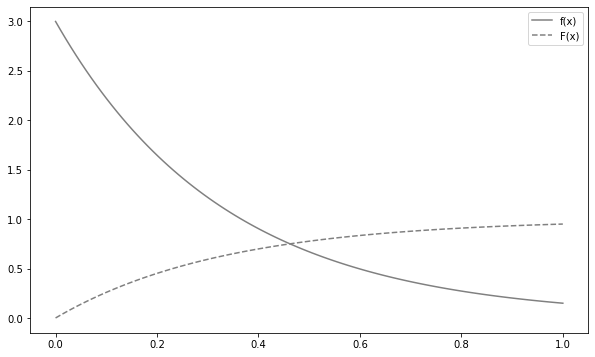

In [56]:
plot_prob(,0,1)

## 정규분포
### 정규분포의 밀도함수
$ f(x)=\frac{1}{\sqrt{2\pi}\sigma}exp   \{ {{-\frac{(x-\mu)^2}{2 \sigma^2}}}\}   \quad-(\infty< x <\infty) $



### 정규분포의 기댓값과 분산
$ X\; \sim \;N(\mu,\sigma^{2})$ 이라고 할때,
$E(X)= \mu,V(X)=\sigma^{2} $

### 정규분포의 변환
$ X\; \sim \;N(\mu,\sigma^{2})$ 이라고 할때, 임의의 실수 a,b에 대해서 

$aX+b \sim N(a\mu + b,a^{2}\sigma^{2})$



In [10]:
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

In [11]:
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [12]:
check_prob(X)

expected vaue 2.000
variance 0.250


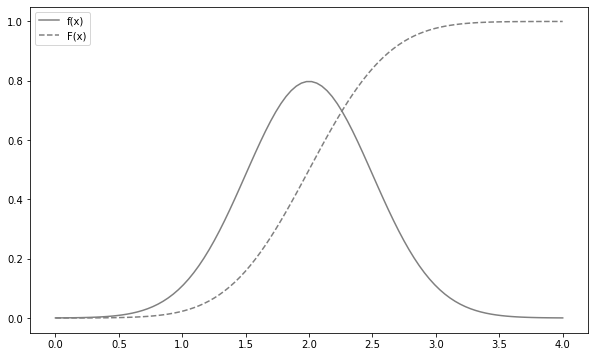

In [13]:
plot_prob(X, 0, 4)

In [14]:
rv = stats.norm(2, 0.5)

In [15]:
rv.mean(), rv.var()

(2.0, 0.25)

In [16]:
rv.pdf(2)

0.7978845608028654

In [17]:
rv.cdf(1.7)

0.27425311775007355

In [18]:
rv.isf(0.3)

2.2622002563540207

In [19]:
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

In [20]:
rv.isf(0.95), rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

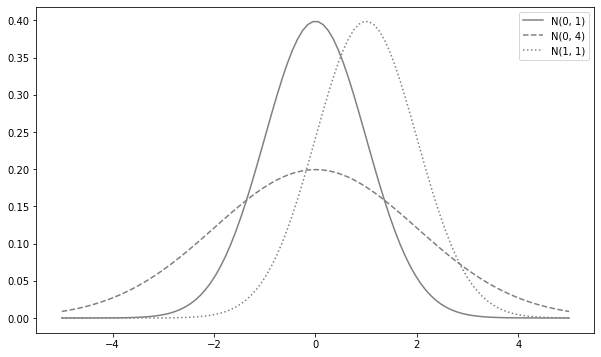

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()

## 지수분포

### 지수분포의 밀도함수
$$
f(x) = \begin{cases}\lambda e^{-\lambda x} \quad(x\leq0)\\0 \;\:\quad(otherwise)\end{cases}​
$$

### 지수분포의 기댓값과 분산

$X\sim Ex(\lambda)$라고 할때
$E(X)=\frac{1}{\lambda}, V(X)=\frac{1}{\lambda^{2}}$


In [22]:
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f

In [23]:
lam = 3
X = Ex(lam)

In [24]:
check_prob(X)

expected vaue 0.333
variance 0.111


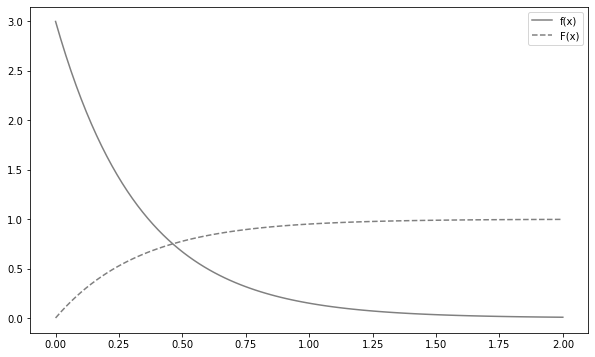

In [25]:
plot_prob(X, 0, 2)

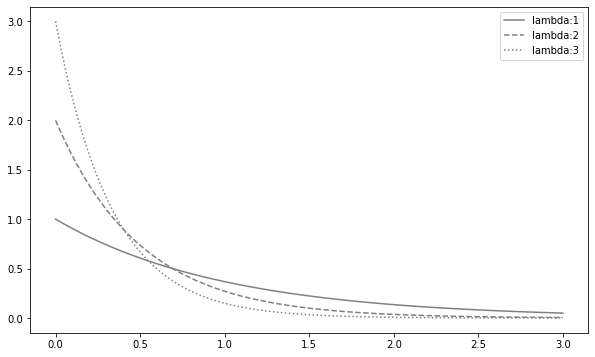

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1, 2, 3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs),
            label=f'lambda:{lam}', ls=ls, color='gray')
ax.legend()

plt.show()

## 카이제곱분포


$Z_1,Z_2,\cdots,Z_n$이 서로 독립이고 N(0,1)을 따르고 있을때,그 제곱합 

$Y=\sum_{i=1}^nZ_{i}^{2}$
의 확률분포를 자유도가 n인 카이제곱분포라고 합니다.


In [27]:
n = 10
rv = stats.norm()
sample_size = int(1e6)
# 표준정규분포로부터 10×100만 사이즈로 무작위추출
Zs_sample = rv.rvs((n, sample_size))
# axis=0에서 총합을 구하고, 표준정규분포의 제곱합 표본 데이터를 구한다
chi2_sample = np.sum(Zs_sample**2, axis=0)

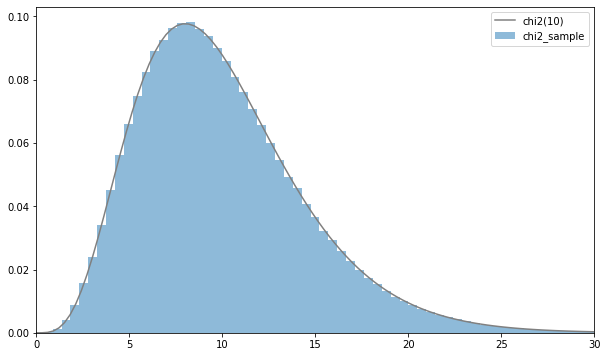

In [28]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
        alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0, 30)
plt.show()

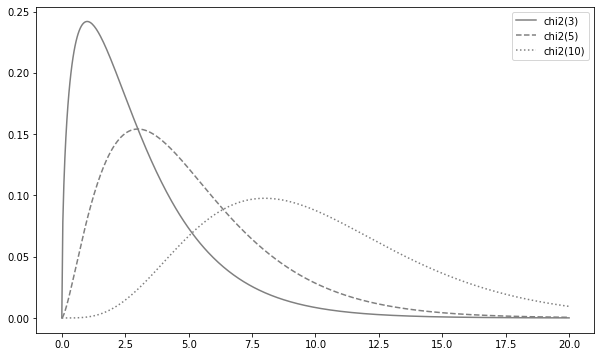

In [29]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

In [30]:
rv = stats.chi2(5)
rv.isf(0.05)

11.070497693516355

## t분포


확률변수 Z,Y는 서로 독립이고, Z는 표준정규분포 N(0,1)을, Y는 자유도가 n인 카이제곱분포 $X^{2}(n)$을 각각 따를 때,

$t=\frac{Z}{\sqrt{Y/n}}$

의 확률분포를 자유도가 n인 t분포라고 합니다.


In [31]:
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

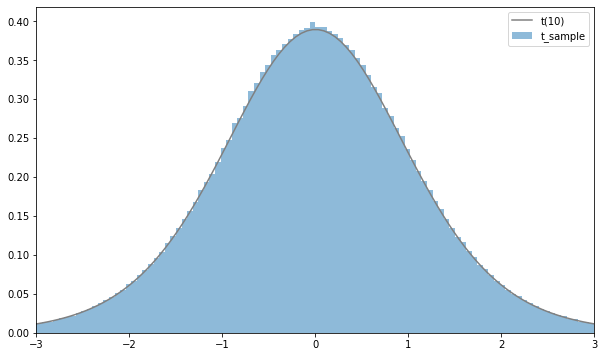

In [32]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3, 3),
        density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

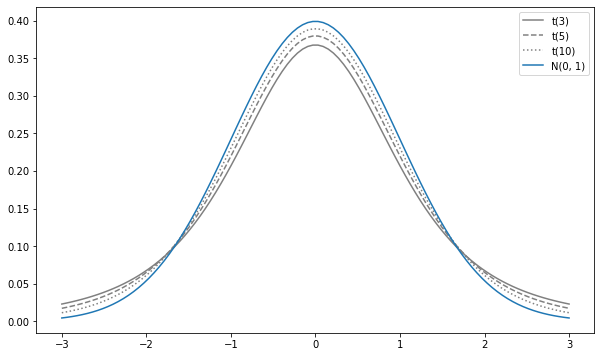

In [33]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label=f't({n})', ls=ls, color='gray')
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')
    
ax.legend()
plt.show()

In [34]:
rv = stats.t(5)
rv.isf(0.05)

2.0150483726691575

## F분포

확률변수 $Y_{1},Y_{2}$는 서로 독립이고, 각각 $Y_{1}\sim X^{2}(n_{1}),Y_{2}\sim X^{2}(n_{2})$를 따를때,

$F=\frac{Y_{1}/n_{1}}{Y_{2}}$

의 확률분포를 자유도가 $n_{1},n_{2}$인 F분포 $F(n_{1},n_{2})$라고 합니다.

In [35]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

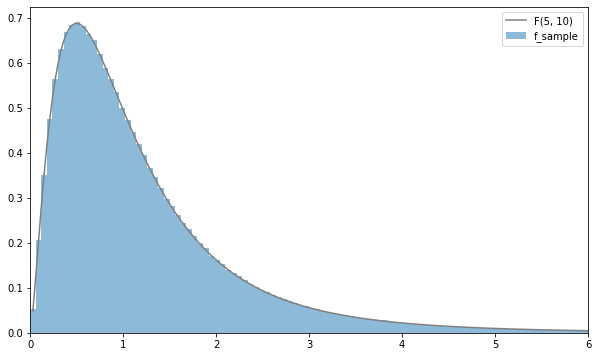

In [36]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2)
xs = np.linspace(0, 6, 200)[1:]
ax.hist(f_sample, bins=100, range=(0, 6),
        density=True, alpha=0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='gray')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

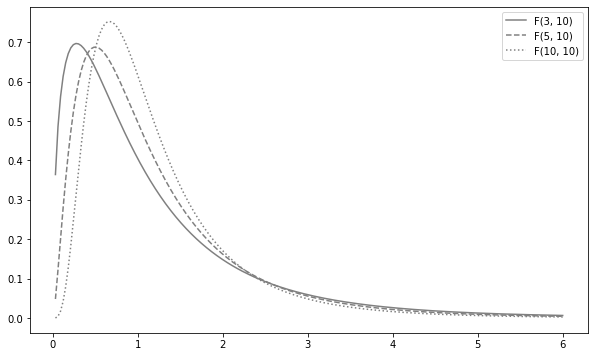

In [37]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3, 5, 10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs),
            label=f'F({n1}, 10)', ls=ls, color='gray')
    
ax.legend()
plt.show()